In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.models import Model


In [2]:
# Specify path to training, validation, and testing data
train_path = 'Dataset/train'
val_path = 'Dataset/val'
test_path = 'Dataset/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = train_path, target_size=(255,255), classes=['cancer','non-cancer'], batch_size = 10)
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = val_path, target_size=(255,255), classes=['cancer','non-cancer'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory = test_path, target_size=(255,255), classes=['cancer','non-cancer'], batch_size = 10,shuffle = False)

Found 12000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [4]:
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

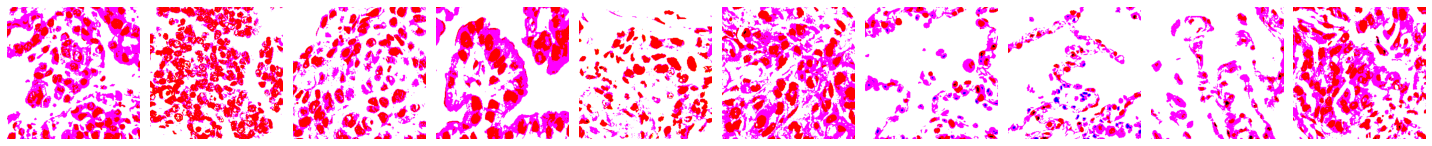

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
print(labels)

In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(255,255,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 254016)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 508034    
Total params: 527,426
Trainable params: 527,426
Non-trainable params: 0
__________________________________________________

In [7]:
history=model.fit(x=train_batches,
    steps_per_epoch=len(train_batches)/10,
    validation_data=val_batches,
    validation_steps=len(val_batches),
    epochs=10)

Epoch 1/10
120/120 [==============================] - 43s 356ms/step - loss: 24.5380 - accuracy: 0.8386 - val_loss: 1.9929 - val_accuracy: 0.9773
Epoch 2/10
120/120 [==============================] - 36s 304ms/step - loss: 1.5076 - accuracy: 0.9695 - val_loss: 0.8862 - val_accuracy: 0.9767
Epoch 3/10
120/120 [==============================] - 38s 314ms/step - loss: 0.6375 - accuracy: 0.9887 - val_loss: 6.5686 - val_accuracy: 0.9467
Epoch 4/10
120/120 [==============================] - 35s 293ms/step - loss: 2.2840 - accuracy: 0.9760 - val_loss: 0.6504 - val_accuracy: 0.9807
Epoch 5/10
120/120 [==============================] - 34s 288ms/step - loss: 0.7983 - accuracy: 0.9836 - val_loss: 0.3267 - val_accuracy: 0.9907
Epoch 6/10
120/120 [==============================] - 34s 283ms/step - loss: 0.5788 - accuracy: 0.9855 - val_loss: 0.9145 - val_accuracy: 0.9840
Epoch 7/10
120/120 [==============================] - 34s 284ms/step - loss: 0.5565 - accuracy: 0.9779 - val_loss: 0.4595 - val_a

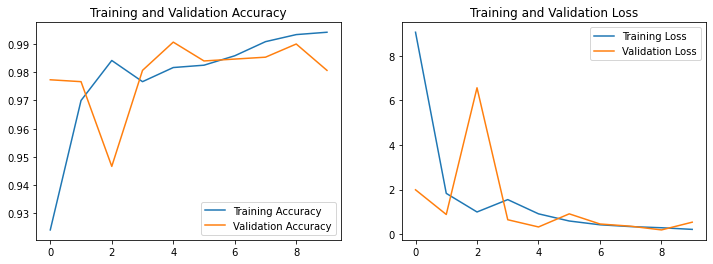

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(test_batches, steps=len(test_batches))
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

150/150 [==============================] - 14s 95ms/step - loss: 0.5026 - accuracy: 0.9827
Test accuracy: 0.9826666712760925
Test loss: 0.5025867819786072


In [10]:
model.save('model_v5.h5')

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

img=image.load_img('new org set/test/cancer/000148 (7).png',target_size=(255,255))

x=image.img_to_array(img)
x.shape


x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

prediction = model.predict(img_data)

print(prediction)

a=np.argmax(model.predict(img_data), axis=1)
print(a)
if(a==1):
    print("No Cancer")
else:
    print("Cancer")

[[0. 1.]]
[1]
No Cancer


In [12]:
img=image.load_img('new org set/test/non-cancer/4 - Copy.png',target_size=(255,255))

x=image.img_to_array(img)
x.shape


x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

prediction = model.predict(img_data)

print(prediction
     )
a=np.argmax(model.predict(img_data), axis=1)
print(a)
if(a==1):
    print("No Cancer")
else:
    print("Cancer")

[[0. 1.]]
[1]
No Cancer


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

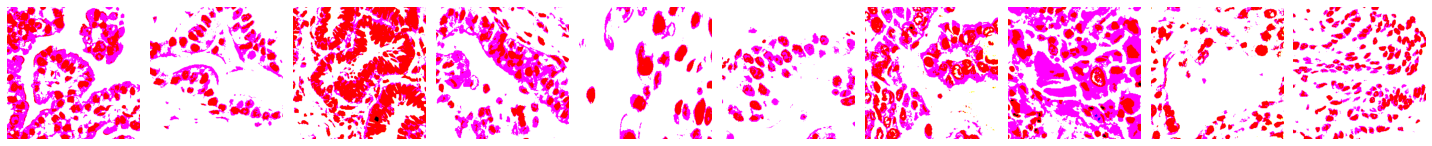

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [14]:
test_batches.classes

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [16]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [17]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [18]:
test_batches.class_indices

{'cancer': 0, 'non-cancer': 1}

Confusion matrix, without normalization
[[1000    0]
 [  26  474]]


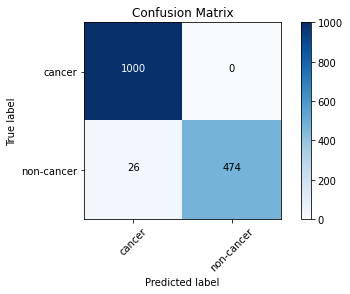

In [19]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cancer','non-cancer']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')